## Sentiment Analysis with Tweepy

### Set up environment

In [2]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       d

### Twitter Authentication

In [37]:
bearer = "Enter the value"
consumer_key = "Enter the value"
consumer_secret = "Enter the value" 
access_token = "Enter the value"
access_token_secret = "Enter the value"

In [39]:
## initialize tweepy
#api = tweepy.Client(bearer, consumer_key, consumer_secret, access_token, access_token_secret)
#api.get_me()

In [40]:
#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='Enter the value')

### Get recent public tweets on a keyword

In [6]:
# Pull tweets from twitter

query = '#WIPL -is:retweet lang:en'
paginator = tweepy.Paginator(              # Calling Pagination a fuction in tweepy to arrange tweets in pages
    client.search_recent_tweets,           # The method you want to use to extract recent tweets 
    query=query,                           # aAgument for getting recent tweets
    max_results=100,                       # Number of tweets per page is defined
    limit=10                               # Number of pages to retrieve is defined
)
# Get tweets that contain the hashtag #TypeKeywordHere
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english

tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

Radha yadav is such a bad bowler how is this bich even in indian team😂😂😂 #wipl #WIPL2023 #wpl #WPL2023
What are you doing Harman Preet Kaur just get out or play the shots please don't waste the balls this is t20 not odi or test #Wipl #WMIVSDCW @ImHarmanpreet
A great spell from Marizanne Kapp👏

#MarizanneKapp #DCvMI #DCvsMI #MIvsDC #MIvDC #DC #MI #DelhiCapitals #MumbaiIndians #WPLAuction #WPL2023 #WPL #WIPL #WomenPremierLeague #WomensIPL #T20 #T20Cricket #Cricket #SBM https://t.co/MawrleGm5J
An outstanding catch from Jemimah Rodrigues and the reaction from her and Meg Lanning tells you how good the catch was😍🔥

📷: JioCinema

#JemimahRodrigues #MegLanning #HayleyMatthews #DCvMI #DCvsMI #MIvsDC #MIvDC #DC #MI #DelhiCapitals #MumbaiIndians #WPL2023 #WPL #WIPL #SBM https://t.co/jQUnOK8AUc
Just tuned in.
C'mon girls @mipaltan let's get the finale ticket !!!!
#mivsdc #WIPL
MASIHA FANTASY PLAYING XI
#TATAWPL #WPL2023 #WomensPremierLeague    #WIPL #Dream11 #dream11 #livescore #livestream
 #Cric

In [7]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,Radha yadav is such a bad bowler how is this b...
1,What are you doing Harman Preet Kaur just get ...
2,A great spell from Marizanne Kapp👏\n\n#Marizan...
3,An outstanding catch from Jemimah Rodrigues an...
4,Just tuned in.\nC'mon girls @mipaltan let's ge...


In [8]:
tweet_list_df.shape

(408, 1)

### Data preprocessing

In [9]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)
    # Tags are removed here

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)
    # All kind of special chaecters are removed in this stage

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  
    # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. 
    # Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  
    # Next, we remove all the single characters and replace it by a space which creates multiple
    # spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [10]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [11]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,Radha yadav is such a bad bowler how is this b...,radha yadav is such bad bowler how is this bic...
1,What are you doing Harman Preet Kaur just get ...,what are you doing harman preet kaur just get ...
2,A great spell from Marizanne Kapp👏\n\n#Marizan...,a great spell from marizanne kapp marizannekap...
3,An outstanding catch from Jemimah Rodrigues an...,an outstanding catch from jemimah rodrigues an...
4,Just tuned in.\nC'mon girls @mipaltan let's ge...,just tuned in mon girls let get the finale tic...


In [12]:
############## TOKENIZING ##################
from nltk.tokenize import word_tokenize
tokenized_tweet = tweet_list_df['cleaned'].apply(word_tokenize)
tweet_list_df['tokenized'] = tokenized_tweet
tweet_list_df.head(5)

,text,cleaned,tokenized
0,Radha yadav is such a bad bowler how is this b...,radha yadav is such bad bowler how is this bic...,"[radha, yadav, is, such, bad, bowler, how, is,..."
1,What are you doing Harman Preet Kaur just get ...,what are you doing harman preet kaur just get ...,"[what, are, you, doing, harman, preet, kaur, j..."
2,A great spell from Marizanne Kapp👏\n\n#Marizan...,a great spell from marizanne kapp marizannekap...,"[a, great, spell, from, marizanne, kapp, mariz..."
3,An outstanding catch from Jemimah Rodrigues an...,an outstanding catch from jemimah rodrigues an...,"[an, outstanding, catch, from, jemimah, rodrig..."
4,Just tuned in.\nC'mon girls @mipaltan let's ge...,just tuned in mon girls let get the finale tic...,"[just, tuned, in, mon, girls, let, get, the, f..."


In [13]:
############## STOPWORDS REMOVAL ##################
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
tweet_list_df['stopwords_removal'] = tweet_list_df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal
0,Radha yadav is such a bad bowler how is this b...,radha yadav is such bad bowler how is this bic...,"[radha, yadav, is, such, bad, bowler, how, is,...","[radha, yadav, bad, bowler, bich, even, indian..."
1,What are you doing Harman Preet Kaur just get ...,what are you doing harman preet kaur just get ...,"[what, are, you, doing, harman, preet, kaur, j...","[harman, preet, kaur, get, play, shots, please..."
2,A great spell from Marizanne Kapp👏\n\n#Marizan...,a great spell from marizanne kapp marizannekap...,"[a, great, spell, from, marizanne, kapp, mariz...","[great, spell, marizanne, kapp, marizannekapp,..."
3,An outstanding catch from Jemimah Rodrigues an...,an outstanding catch from jemimah rodrigues an...,"[an, outstanding, catch, from, jemimah, rodrig...","[outstanding, catch, jemimah, rodrigues, react..."
4,Just tuned in.\nC'mon girls @mipaltan let's ge...,just tuned in mon girls let get the finale tic...,"[just, tuned, in, mon, girls, let, get, the, f...","[tuned, mon, girls, let, get, finale, ticket, ..."


In [14]:
############## STEMMING ##################
from nltk.stem import PorterStemmer
def porter_stemmer(text):
    """
        Stem words in list of tokenized words with PorterStemmer
    """
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

tweet_list_df['stemming'] = tweet_list_df['stopwords_removal'].apply(lambda x: porter_stemmer(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming
0,Radha yadav is such a bad bowler how is this b...,radha yadav is such bad bowler how is this bic...,"[radha, yadav, is, such, bad, bowler, how, is,...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian..."
1,What are you doing Harman Preet Kaur just get ...,what are you doing harman preet kaur just get ...,"[what, are, you, doing, harman, preet, kaur, j...","[harman, preet, kaur, get, play, shots, please...","[harman, preet, kaur, get, play, shot, pleas, ..."
2,A great spell from Marizanne Kapp👏\n\n#Marizan...,a great spell from marizanne kapp marizannekap...,"[a, great, spell, from, marizanne, kapp, mariz...","[great, spell, marizanne, kapp, marizannekapp,...","[great, spell, marizann, kapp, marizannekapp, ..."
3,An outstanding catch from Jemimah Rodrigues an...,an outstanding catch from jemimah rodrigues an...,"[an, outstanding, catch, from, jemimah, rodrig...","[outstanding, catch, jemimah, rodrigues, react...","[outstand, catch, jemimah, rodrigu, reaction, ..."
4,Just tuned in.\nC'mon girls @mipaltan let's ge...,just tuned in mon girls let get the finale tic...,"[just, tuned, in, mon, girls, let, get, the, f...","[tuned, mon, girls, let, get, finale, ticket, ...","[tune, mon, girl, let, get, final, ticket, miv..."


In [15]:
############## LEMATIZING ##################
from nltk.stem import WordNetLemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweet_list_df['lemmatized'] = tweet_list_df['stopwords_removal'].apply(lambda x: lemmatizer_on_text(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized
0,Radha yadav is such a bad bowler how is this b...,radha yadav is such bad bowler how is this bic...,"[radha, yadav, is, such, bad, bowler, how, is,...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian..."
1,What are you doing Harman Preet Kaur just get ...,what are you doing harman preet kaur just get ...,"[what, are, you, doing, harman, preet, kaur, j...","[harman, preet, kaur, get, play, shots, please...","[harman, preet, kaur, get, play, shot, pleas, ...","[harman, preet, kaur, get, play, shots, please..."
2,A great spell from Marizanne Kapp👏\n\n#Marizan...,a great spell from marizanne kapp marizannekap...,"[a, great, spell, from, marizanne, kapp, mariz...","[great, spell, marizanne, kapp, marizannekapp,...","[great, spell, marizann, kapp, marizannekapp, ...","[great, spell, marizanne, kapp, marizannekapp,..."
3,An outstanding catch from Jemimah Rodrigues an...,an outstanding catch from jemimah rodrigues an...,"[an, outstanding, catch, from, jemimah, rodrig...","[outstanding, catch, jemimah, rodrigues, react...","[outstand, catch, jemimah, rodrigu, reaction, ...","[outstanding, catch, jemimah, rodrigues, react..."
4,Just tuned in.\nC'mon girls @mipaltan let's ge...,just tuned in mon girls let get the finale tic...,"[just, tuned, in, mon, girls, let, get, the, f...","[tuned, mon, girls, let, get, finale, ticket, ...","[tune, mon, girl, let, get, final, ticket, miv...","[tuned, mon, girls, let, get, finale, ticket, ..."


In [16]:
############## TAGGING ##################
tweet_list_df['tagging'] = tweet_list_df['lemmatized'].apply(lambda x: nltk.pos_tag(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized,tagging
0,Radha yadav is such a bad bowler how is this b...,radha yadav is such bad bowler how is this bic...,"[radha, yadav, is, such, bad, bowler, how, is,...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian...","[(radha, NN), (yadav, NN), (bad, JJ), (bowler,..."
1,What are you doing Harman Preet Kaur just get ...,what are you doing harman preet kaur just get ...,"[what, are, you, doing, harman, preet, kaur, j...","[harman, preet, kaur, get, play, shots, please...","[harman, preet, kaur, get, play, shot, pleas, ...","[harman, preet, kaur, get, play, shots, please...","[(harman, JJ), (preet, NN), (kaur, NNS), (get,..."
2,A great spell from Marizanne Kapp👏\n\n#Marizan...,a great spell from marizanne kapp marizannekap...,"[a, great, spell, from, marizanne, kapp, mariz...","[great, spell, marizanne, kapp, marizannekapp,...","[great, spell, marizann, kapp, marizannekapp, ...","[great, spell, marizanne, kapp, marizannekapp,...","[(great, JJ), (spell, NN), (marizanne, NN), (k..."
3,An outstanding catch from Jemimah Rodrigues an...,an outstanding catch from jemimah rodrigues an...,"[an, outstanding, catch, from, jemimah, rodrig...","[outstanding, catch, jemimah, rodrigues, react...","[outstand, catch, jemimah, rodrigu, reaction, ...","[outstanding, catch, jemimah, rodrigues, react...","[(outstanding, JJ), (catch, NN), (jemimah, NN)..."
4,Just tuned in.\nC'mon girls @mipaltan let's ge...,just tuned in mon girls let get the finale tic...,"[just, tuned, in, mon, girls, let, get, the, f...","[tuned, mon, girls, let, get, finale, ticket, ...","[tune, mon, girl, let, get, final, ticket, miv...","[tuned, mon, girls, let, get, finale, ticket, ...","[(tuned, JJ), (mon, JJ), (girls, NNS), (let, V..."


### Generate Sentiment Labels

In [17]:
#Calculating the polarity and subjectivity of the tweet using Textblob Analyzer
tweet_list_df[['polarity', 'subjectivity']]=tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
def textblob_sentiment(sentiment):
    if sentiment <= -0.05:
        x = "negative"
    elif sentiment >= 0.05:
        x = "positive"
    else:
        x = "neutral"

    return x

tweet_list_df['textblob_sentiment'] = tweet_list_df['polarity'].apply(lambda x: textblob_sentiment(x))
tweet_list_df.head(5)

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized,tagging,polarity,subjectivity,textblob_sentiment
0,Radha yadav is such a bad bowler how is this b...,radha yadav is such bad bowler how is this bic...,"[radha, yadav, is, such, bad, bowler, how, is,...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian...","[(radha, NN), (yadav, NN), (bad, JJ), (bowler,...",-0.35,0.583333,negative
1,What are you doing Harman Preet Kaur just get ...,what are you doing harman preet kaur just get ...,"[what, are, you, doing, harman, preet, kaur, j...","[harman, preet, kaur, get, play, shots, please...","[harman, preet, kaur, get, play, shot, pleas, ...","[harman, preet, kaur, get, play, shots, please...","[(harman, JJ), (preet, NN), (kaur, NNS), (get,...",-0.20,0.000000,negative
2,A great spell from Marizanne Kapp👏\n\n#Marizan...,a great spell from marizanne kapp marizannekap...,"[a, great, spell, from, marizanne, kapp, mariz...","[great, spell, marizanne, kapp, marizannekapp,...","[great, spell, marizann, kapp, marizannekapp, ...","[great, spell, marizanne, kapp, marizannekapp,...","[(great, JJ), (spell, NN), (marizanne, NN), (k...",0.80,0.750000,positive
3,An outstanding catch from Jemimah Rodrigues an...,an outstanding catch from jemimah rodrigues an...,"[an, outstanding, catch, from, jemimah, rodrig...","[outstanding, catch, jemimah, rodrigues, react...","[outstand, catch, jemimah, rodrigu, reaction, ...","[outstanding, catch, jemimah, rodrigues, react...","[(outstanding, JJ), (catch, NN), (jemimah, NN)...",0.60,0.737500,positive
4,Just tuned in.\nC'mon girls @mipaltan let's ge...,just tuned in mon girls let get the finale tic...,"[just, tuned, in, mon, girls, let, get, the, f...","[tuned, mon, girls, let, get, finale, ticket, ...","[tune, mon, girl, let, get, final, ticket, miv...","[tuned, mon, girls, let, get, finale, ticket, ...","[(tuned, JJ), (mon, JJ), (girls, NNS), (let, V...",0.00,0.000000,neutral


In [18]:
#Calculating Negative, Positive, Neutral and Compound values using NLTK VADER Sentiment Intensity Analyzer

for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'vader_sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'vader_sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'vader_sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

tweet_list_df.head(5)

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized,tagging,polarity,subjectivity,textblob_sentiment,vader_sentiment,neg,neu,pos,compound
0,Radha yadav is such a bad bowler how is this b...,radha yadav is such bad bowler how is this bic...,"[radha, yadav, is, such, bad, bowler, how, is,...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian...","[radha, yadav, bad, bowler, bich, even, indian...","[(radha, NN), (yadav, NN), (bad, JJ), (bowler,...",-0.35,0.583333,negative,negative,0.171,0.829,0.000,-0.5423
1,What are you doing Harman Preet Kaur just get ...,what are you doing harman preet kaur just get ...,"[what, are, you, doing, harman, preet, kaur, j...","[harman, preet, kaur, get, play, shots, please...","[harman, preet, kaur, get, play, shot, pleas, ...","[harman, preet, kaur, get, play, shots, please...","[(harman, JJ), (preet, NN), (kaur, NNS), (get,...",-0.20,0.000000,negative,positive,0.086,0.769,0.145,0.2263
2,A great spell from Marizanne Kapp👏\n\n#Marizan...,a great spell from marizanne kapp marizannekap...,"[a, great, spell, from, marizanne, kapp, mariz...","[great, spell, marizanne, kapp, marizannekapp,...","[great, spell, marizann, kapp, marizannekapp, ...","[great, spell, marizanne, kapp, marizannekapp,...","[(great, JJ), (spell, NN), (marizanne, NN), (k...",0.80,0.750000,positive,positive,0.000,0.849,0.151,0.6249
3,An outstanding catch from Jemimah Rodrigues an...,an outstanding catch from jemimah rodrigues an...,"[an, outstanding, catch, from, jemimah, rodrig...","[outstanding, catch, jemimah, rodrigues, react...","[outstand, catch, jemimah, rodrigu, reaction, ...","[outstanding, catch, jemimah, rodrigues, react...","[(outstanding, JJ), (catch, NN), (jemimah, NN)...",0.60,0.737500,positive,positive,0.000,0.835,0.165,0.7845
4,Just tuned in.\nC'mon girls @mipaltan let's ge...,just tuned in mon girls let get the finale tic...,"[just, tuned, in, mon, girls, let, get, the, f...","[tuned, mon, girls, let, get, finale, ticket, ...","[tune, mon, girl, let, get, final, ticket, miv...","[tuned, mon, girls, let, get, finale, ticket, ...","[(tuned, JJ), (mon, JJ), (girls, NNS), (let, V...",0.00,0.000000,neutral,neutral,0.000,1.000,0.000,0.0000


### Sentiment Visualisation

In [19]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["vader_sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["vader_sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["vader_sentiment"]=="neutral"]

#### Donut Charts

In [20]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [21]:
#Count_values for textblob sentiment
count_values_in_column(tweet_list_df,"textblob_sentiment")

,Total,Percentage
positive,206,50.49
neutral,168,41.18
negative,34,8.33


In [22]:
#Count_values for vader sentiment
count_values_in_column(tweet_list_df,"vader_sentiment")

,Total,Percentage
positive,263,64.46
neutral,107,26.23
negative,38,9.31


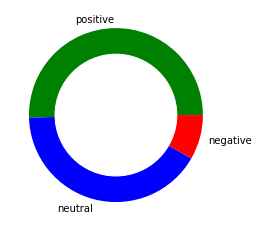

In [23]:
# create data for Pie Chart text blob
pichart = count_values_in_column(tweet_list_df,"textblob_sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

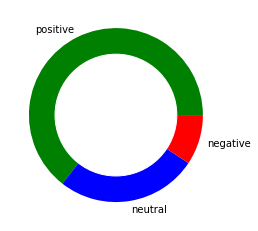

In [24]:
# create data for Pie Chart text blob
pichart = count_values_in_column(tweet_list_df,"vader_sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Word Clouds

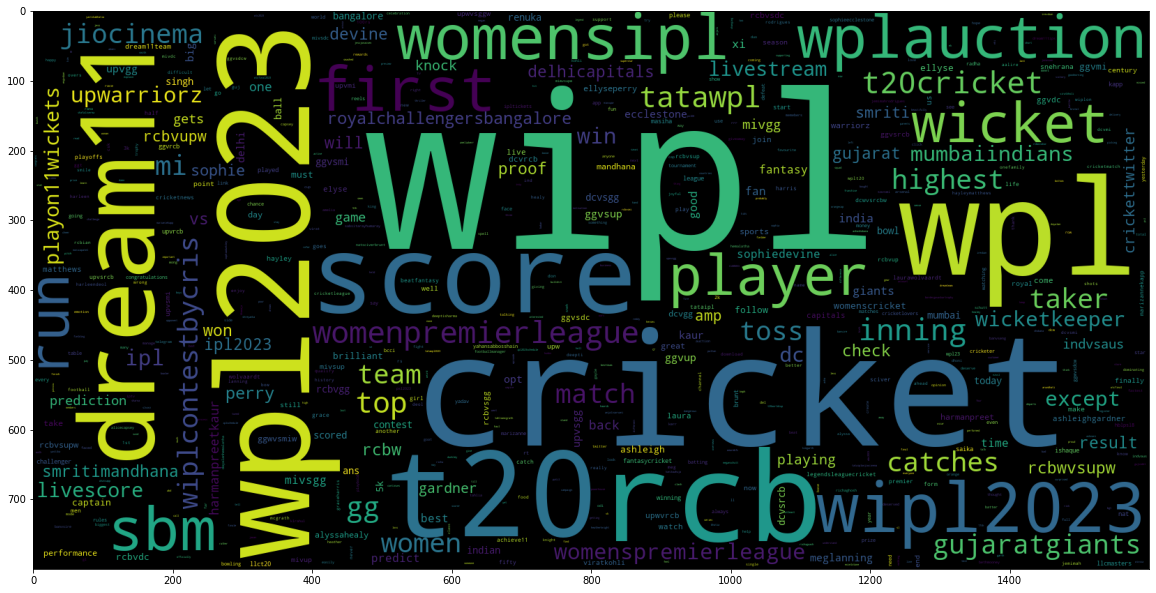

In [25]:
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False)
plt.figure(figsize = (20,20))
wc = word_cloud.generate(" ".join(tweet_list_df['cleaned']))
plt.imshow(wc)

#### Text Insights

In [26]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [27]:
round(pd.DataFrame(tweet_list_df.groupby("textblob_sentiment").text_len.mean()),2)

,text_len
textblob_sentiment,
negative,139.35
neutral,127.02
positive,163.17


In [28]:
round(pd.DataFrame(tweet_list_df.groupby("textblob_sentiment").text_word_count.mean()),2)

,text_word_count
textblob_sentiment,
negative,22.00
neutral,18.11
positive,24.87


In [29]:
round(pd.DataFrame(tweet_list_df.groupby("vader_sentiment").text_len.mean()),2)

,text_len
vader_sentiment,
negative,153.13
neutral,104.02
positive,162.52


In [30]:
round(pd.DataFrame(tweet_list_df.groupby("vader_sentiment").text_word_count.mean()),2)

,text_word_count
vader_sentiment,
negative,23.97
neutral,15.00
positive,24.33


### Saving Output Tweets File to Drive

In [41]:
#tweet_list_df.to_csv("c:/Users/", sep=',', encoding='UTF-8')

In [32]:
tweet_list_df.shape

(408, 17)